In [1]:
"""import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from OLS import OLS_parameters 
from polynomial_features import polynomial_features
import importlib, gradient_descent
importlib.reload(gradient_descent)
from gradient_descent import gradient_descent_OLS, gradient_descent_Ridge

def f(x): 
    return 1/(1+25*x**2)


rng = np.random.default_rng(seed=6114)
x = np.linspace(-1,1,100)
y_true = f(x)

noise = rng.normal(loc=0.0, scale=0.01, size=x.shape)
y = y_true + noise


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6114)
"""

'import numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.metrics import mean_squared_error, r2_score\nfrom OLS import OLS_parameters \nfrom polynomial_features import polynomial_features\nimport importlib, gradient_descent\nimportlib.reload(gradient_descent)\nfrom gradient_descent import gradient_descent_OLS, gradient_descent_Ridge\n\ndef f(x): \n    return 1/(1+25*x**2)\n\n\nrng = np.random.default_rng(seed=6114)\nx = np.linspace(-1,1,100)\ny_true = f(x)\n\nnoise = rng.normal(loc=0.0, scale=0.01, size=x.shape)\ny = y_true + noise\n\n\nx_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6114)\n'

In [2]:
# Import libraries and functions:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Import our own implementations
import importlib, gradient_descent, OLS, prepare_data, polynomial_features
importlib.reload(gradient_descent)
importlib.reload(OLS)
importlib.reload(prepare_data)
importlib.reload(polynomial_features)

from prepare_data import prepare_data
from polynomial_features import polynomial_features
from gradient_descent import gradient_descent_OLS, gradient_descent_Ridge
from OLS import OLS_parameters


In [3]:
# Test gradient descent method, OLS:
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)
p = 5

X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)


beta = gradient_descent_OLS(X_train_s, y_train, eta=0.1, num_iters=10000, print_num_iters=True)
print("GD parameters: ", beta)
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)


Number of iterations:  9436
GD parameters:  [-0.05363074 -0.70385857  0.12499872  0.5082594  -0.0711554 ]
Closed-form OLS coefficients:  [-0.05363465 -0.70385875  0.12501007  0.50825947 -0.07116328]


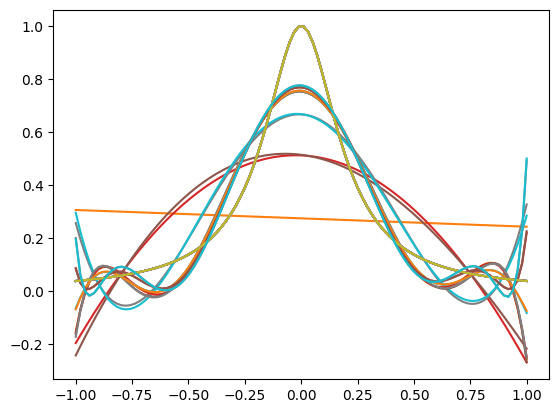

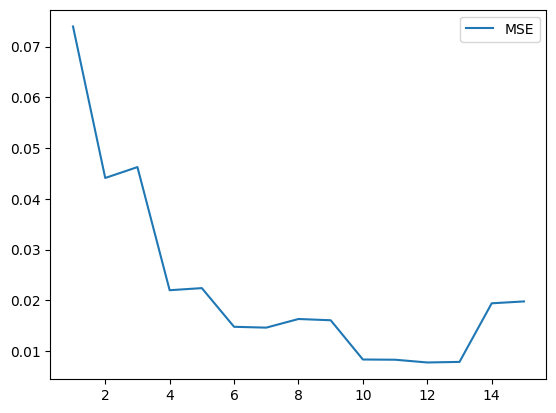

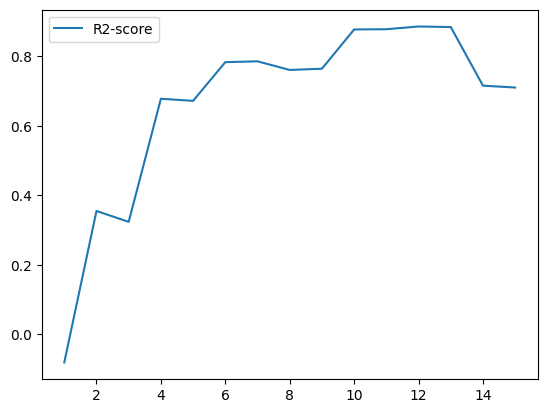

In [4]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

deg_max = 15
MSE=[]
R2_score= []
for p in range(1, deg_max+1):
    X_plot = polynomial_features(x, p, intercept=False)
    X_train = polynomial_features(x_train, p, intercept=False)
    X_test  = polynomial_features(x_test, p, intercept=False)

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_s = scaler.transform(X_train)
    X_test_s  = scaler.transform(X_test)
    X_plot_s  = scaler.transform(X_plot)
    
    beta = gradient_descent_OLS(X_train_s, y_train, eta=0.1, num_iters=10000)
    y_offset = np.mean(y)
    y_pred = X_test_s @ beta + y_offset
    MSE.append(mean_squared_error(y_test, y_pred))
    R2_score.append(r2_score(y_true=y_test, y_pred=y_pred))
    
    plt.plot(x, y)
    plt.plot(x, X_plot_s@beta + y_offset)
plt.show()   
degrees = np.arange(1, deg_max+1)
plt.plot(degrees, MSE, label="MSE")
plt.legend()
plt.show()
plt.plot(degrees, R2_score, label="R2-score")
plt.legend()
plt.show()

    

In [5]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data()

p = 12
MSE_ridge=[]
R2_score_ridge= []
lambdas=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0, 0.1, 1, 10]
#print(lambdas)
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)
for l in lambdas:
    beta = gradient_descent_Ridge(X_train_s, y_train, eta=0.01, lam=l, num_iters=10000)
    y_pred = X_test_s @ beta
    MSE_ridge.append(mean_squared_error(y_test, y_pred))
    R2_score_ridge.append(r2_score(y_true=y_test, y_pred=y_pred))
    
    plt.plot(x, X_plot_s@beta + np.mean(y), label=f"lambda={l}")
    
plt.title(f"Polynomial degree = {p}")
plt.plot(x, y, label="runges")
plt.legend()    
plt.show()


c:\Users\ofurn\Dokumenter\Github\FYSSTK3155\PROJECT 1\Code\gradient_descent.py:73: RuntimeWarning: overflow encountered in matmul
  grad = 2 * (X.T @ (X @ theta - y) + lam * theta)
c:\Users\ofurn\Dokumenter\Github\FYSSTK3155\PROJECT 1\Code\gradient_descent.py:73: RuntimeWarning: invalid value encountered in matmul
  grad = 2 * (X.T @ (X @ theta - y) + lam * theta)


ValueError: Input contains NaN.

In [ ]:
"""
# Teste uten loop:
p = 5
l=0.1
X_plot = polynomial_features(x, p, intercept=True)
X_train = polynomial_features(x_train, p, intercept=True)
X_test  = polynomial_features(x_test, p, intercept=True)
scaler = StandardScaler()
scaler.fit(X_train[:, 1:])

X_train_s = np.hstack([X_train[:, [0]], scaler.transform(X_train[:, 1:])])
X_test_s  = np.hstack([X_test[:,  [0]], scaler.transform(X_test[:,  1:])])
X_plot_s  = np.hstack([X_plot[:,  [0]], scaler.transform(X_plot[:,  1:])])

beta=gradient_descent_Ridge(X_train_s, y_train, eta=0.1, lam=l)
print(beta)
y_pred=X_test_s@beta

print(beta.shape, X_test_s.shape)
print(y_pred)
"""


'\n# Teste uten loop:\np = 5\nl=0.1\nX_plot = polynomial_features(x, p, intercept=True)\nX_train = polynomial_features(x_train, p, intercept=True)\nX_test  = polynomial_features(x_test, p, intercept=True)\nscaler = StandardScaler()\nscaler.fit(X_train[:, 1:])\n\nX_train_s = np.hstack([X_train[:, [0]], scaler.transform(X_train[:, 1:])])\nX_test_s  = np.hstack([X_test[:,  [0]], scaler.transform(X_test[:,  1:])])\nX_plot_s  = np.hstack([X_plot[:,  [0]], scaler.transform(X_plot[:,  1:])])\n\nbeta=gradient_descent_Ridge(X_train_s, y_train, eta=0.1, lam=l)\nprint(beta)\ny_pred=X_test_s@beta\n\nprint(beta.shape, X_test_s.shape)\nprint(y_pred)\n'